# Graficador de ecuaciones diferenciales

Proyectos de código
https://github.com/laloroe/Graficador

## Funcionalidad
El sofware esta enfocado a visualizar un sistema de ecuaciones diferenciales 2x2:
* Plano fase.
* Nulclina.
* Region de atrapamiento.
* Puntos de equilibrio.
* Linealización.
También permite visualizar la solución de un sistema de ecuaciones diferenciales respecto a la variable independiente.
Así mismo permite comparar la solución del sistema con la solución de su linealización.

In [56]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()  # Desactiva el modo interactivo de matplotlib

# RUNGE KUTTA 4° ORDER
def runge_kutta(f1_original, f2_original, y0, h, n):
    """
    Implementación del método de Runge-Kutta de cuarto orden para sistemas de ecuaciones diferenciales.
    
    Parámetros:
    - func: función que calcula las derivadas del sistema
    - y0: condiciones iniciales (array de numpy)
    - h: tamaño del paso
    - n: número de pasos
    
    Retorna:
    - y: matriz con la solución del sistema
    """
    y = np.zeros((len(y0), n+1))
    y[:,0] = y0
    
    for k in range(n):
        k1 = f(y[:,k], f1_original, f2_original)
        k2 = f(y[:,k] + (h/2)*k1, f1_original, f2_original)
        k3 = f(y[:,k] + (h/2)*k2, f1_original, f2_original)
        k4 = f(y[:,k] + h*k3, f1_original, f2_original)
        y[:,k+1] = y[:,k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return y

# SISTEMA DE ECUACIONES
def f(z,f1_original,f2_original):
    """
    Función que calcula las derivadas del sistema
    Parámetros:
    - z = array de numpy con las variables (x,y)
    - f1_original = expresión que representa la derivada respecto a x
    - f2_original = expresión que representa la derivada respecto a y

    Retorna:
    - derivadas = array de numpy con las derivadas
    """
    x, y =z
    dx = eval(f1_original)
    dy = eval(f2_original)
    return np.array([dx,dy])


Ingresar funciones

In [32]:
"""
Obtener la expresión de la ecuación diferencial

Se pide al usuario ingresar la expresión de la ecuación diferencial.

Se pide al usuario si se desea incluir la perturbación o no. Si se desea incluir la perturbación, se pide al usuario ingresar la expresión de la perturbación.
"""
f1_original = input("dx/dt = ")
f2_original = input("dy/dt = ")
nombre = input("Ingresar el nombre del sistema = ")
print(f"El sistema {nombre} se expresa como:")
print(f"dx/dt = {f1_original}")
print(f"dy/dt = {f2_original}")

perturbacion = input("Ingresar un sistema perturbado Si (ingresa y) o  No (ingresa cualquier caracter) = ")
if perturbacion.upper() == "y":
    print("La perturbación se expresa como 'e'")
    f1_original_perturbado = input("dx/dt = ")
    f2_original_perturbado = input("dy/dt = ")
    e = input("Ingresar el valor de la expresión de la perturbación e = ")

El sistema Circulo initario se expresa como:
dx/dt = -y+x*(1-x**2-y**2)
dy/dt = x+y*(1-x**2-y**2)


In [60]:
# Crea una cuadrícula de valores x e y
# Límites
Lx_inf = int(input("Límite inferior de x: "))
Lx_sup = int(input("Límite superior de x: "))
Ly_inf = int(input("Límite inferior de y: "))
Ly_sup = int(input("Límite superior de y: "))

n = int(input("Número de puntos: "))  # Número de puntos en cada lado de la cuadrícula
x = np.linspace(Lx_inf, Lx_sup, n)  # Crea un vector de n puntos entre -L y L
y = np.linspace(Ly_inf, Ly_sup, n)  # Crea un vector de n puntos entre -L y L
X, Y = np.meshgrid(x, y)  # Crea la cuadrícula

# Calcula las derivadas en cada punto de la cuadrícula
d = f(np.array([X, Y]), f1_original, f2_original)
dX=d[0,:,:]
dY=d[1,:,:]

# Definir la graficación pero no graficar
# Graficar el campo vectorial
fig, ax = plt.subplots(figsize = (10,10))
q = ax.quiver(X, Y, dX, dY, units='x', pivot='tip', width=0.009, scale=30)
ax.quiverkey(q, 0.9, 0.9, 1, label = 'Plano fase',labelpos='E',coordinates='figure')
ax.set_title(f'{nombre}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(Lx_inf, Lx_sup)
ax.set_ylim(Ly_inf, Ly_sup) 


(-3.0, 3.0)

In [ ]:
z0 = input("Ingrese las condiciones iniciales: x0,y0 x1,y1 x2,y2 ... : ")
z0 = z0.split(' ')
z0 = [i.split(',') for i in z0]
z0 = [list(map(float, i)) for i in z0]
z0 = np.array(z0)
for y0 in z0:
    z_rk=runge_kutta(f1_original,f2_original,y0,0.1,5000)
    x_rk=z_rk[0,:]
    y_rk=z_rk[1,:]
    plt.plot(x_rk, y_rk, label=f'Flujo no lineal de la EDO con X(0)={y0}', color='cyan')
    if perturbacion.upper() == 'y':
        y0_perturbado = np.array([0.01,-0.01])
        z_rk_perturbado = runge_kutta(f1_original_perturbado,f2_original_perturbado,y0,0.1,5000)
        x_rk_perturbado = z_rk_perturbado[0,:]
        y_rk_perturbado = z_rk_perturbado[1,:]
        plt.plot(x_rk_perturbado, y_rk_perturbado, label=f'Flujo de la EDO perturbada con X(0)={y0}', color='green')

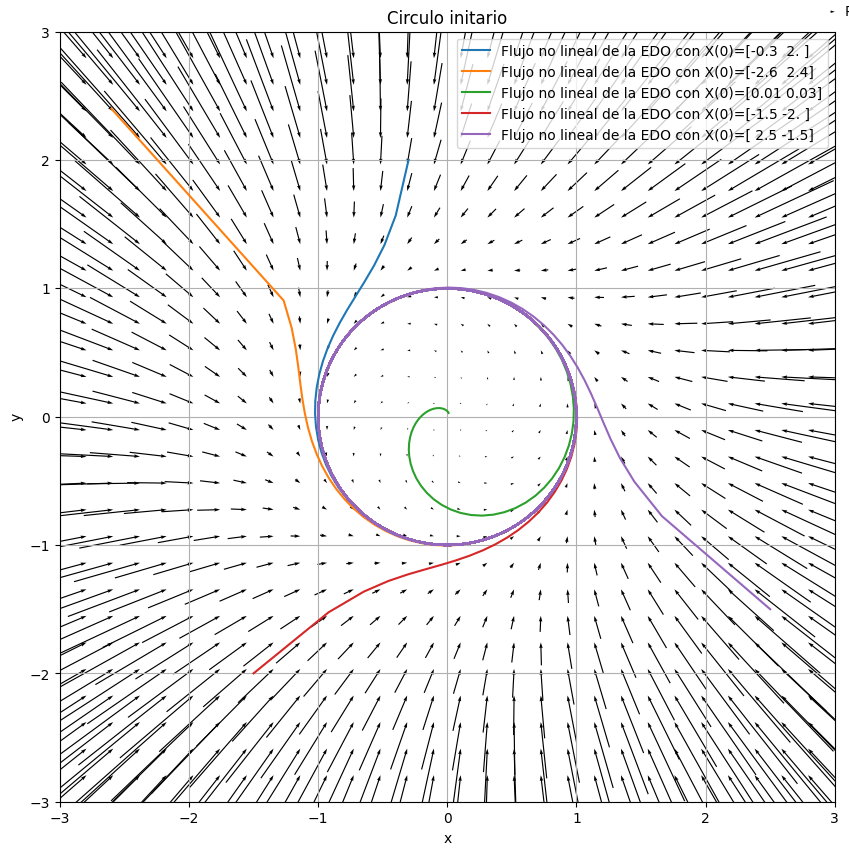

In [62]:
plt.legend()
plt.grid(True)
plt.show()